## Final Project Submission

Please fill out:
* Student name: Matthew Sparr
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
len(df)

21597

In [8]:
sorted(df.bedrooms.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

In [9]:
sorted(df.bathrooms.unique())

[0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

In [10]:
sorted(df.condition.unique())

[1, 2, 3, 4, 5]

In [11]:
sorted(df.grade.unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [12]:
sorted(df.yr_built.unique())

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [13]:
sorted(df.zipcode.unique())

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [14]:
sorted(df.sqft_basement.unique())

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0',
 '1120.0',
 '1130.0',
 '1135.0',
 '1140.0',
 '1150.0',
 '1160.0',
 '1170.0',
 '1180.0',
 '1190.0',
 '120.0',
 '1200.0',
 '1210.0',
 '1220.0',
 '1230.0',
 '1240.0',
 '1245.0',
 '1248.0',
 '1250.0',
 '1260.0',
 '1270.0',
 '1275.0',
 '1280.0',
 '1281.0',
 '1284.0',
 '1290.0',
 '130.0',
 '1300.0',
 '1310.0',
 '1320.0',
 '1330.0',
 '1340.0',
 '1350.0',
 '1360.0',
 '1370.0',
 '1380.0',
 '1390.0',
 '140.0',
 '1400.0',
 '1410.0',
 '1420.0',
 '143.0',
 '1430.0',
 '1440.0',
 '145.0',
 '1450.0',
 '1460.0',
 '1470.0',
 '1480.0',
 '1481.0',
 '1490.0',
 '150.0',
 '1500.0',
 '1510.0',
 '1520.0',
 '1525.0',
 '1530.0',
 '1540.0',
 '1548.0',
 '1550.0',
 '1560.0',
 '1570.0',
 '1580.0',
 '1590.0',
 '160.0',
 '1600.0',
 '1610.0',
 '1620.0',
 '1630.0',
 '1640.0',
 '1650.0',
 '1660.0',
 '1670.0',
 '1680.0',
 '1690.0',
 '

In [15]:
df[df.sqft_basement == '?'].shape[0]

454

In [16]:
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)

In [17]:
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [18]:
df.sqft_basement.describe()

count    21597.000000
mean       291.852739
std        437.822440
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [20]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [21]:
for i in range(0,5):
    print (str(i) + " - " + str(df.view[df.view == i].shape[0]))
print("NaN - " + str(df.view.isnull().sum()))

0 - 19422
1 - 330
2 - 957
3 - 508
4 - 317
NaN - 63


In [22]:
df.drop('view', axis=1, inplace=True)

In [23]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [24]:
df.waterfront[df.waterfront == 0].shape

(19075,)

In [25]:
df.waterfront[df.waterfront == 1].shape

(146,)

In [26]:
df.drop('waterfront', axis=1, inplace=True)

In [27]:
df.yr_renovated.shape[0]

21597

In [28]:
df.yr_renovated.dtype

dtype('float64')

In [29]:
print ("Not renovated - " + str(df.yr_renovated[df.yr_renovated == 0].shape[0]))
print ("Renovated - " + str(df.yr_renovated[df.yr_renovated > 0].shape[0]))
print("NaN - " + str(df.yr_renovated.isnull().sum()))

Not renovated - 17011
Renovated - 744
NaN - 3842


In [30]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [31]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
df['renovated'] = df.apply(lambda row: 0 if row.yr_renovated < 1 else 1, axis=1)

In [33]:
df.renovated = df.renovated.astype('category')

In [38]:
df.drop('yr_renovated', axis=1, inplace=True)

In [35]:
df.drop('id', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F070A2FCF8>,
      dtype=object)

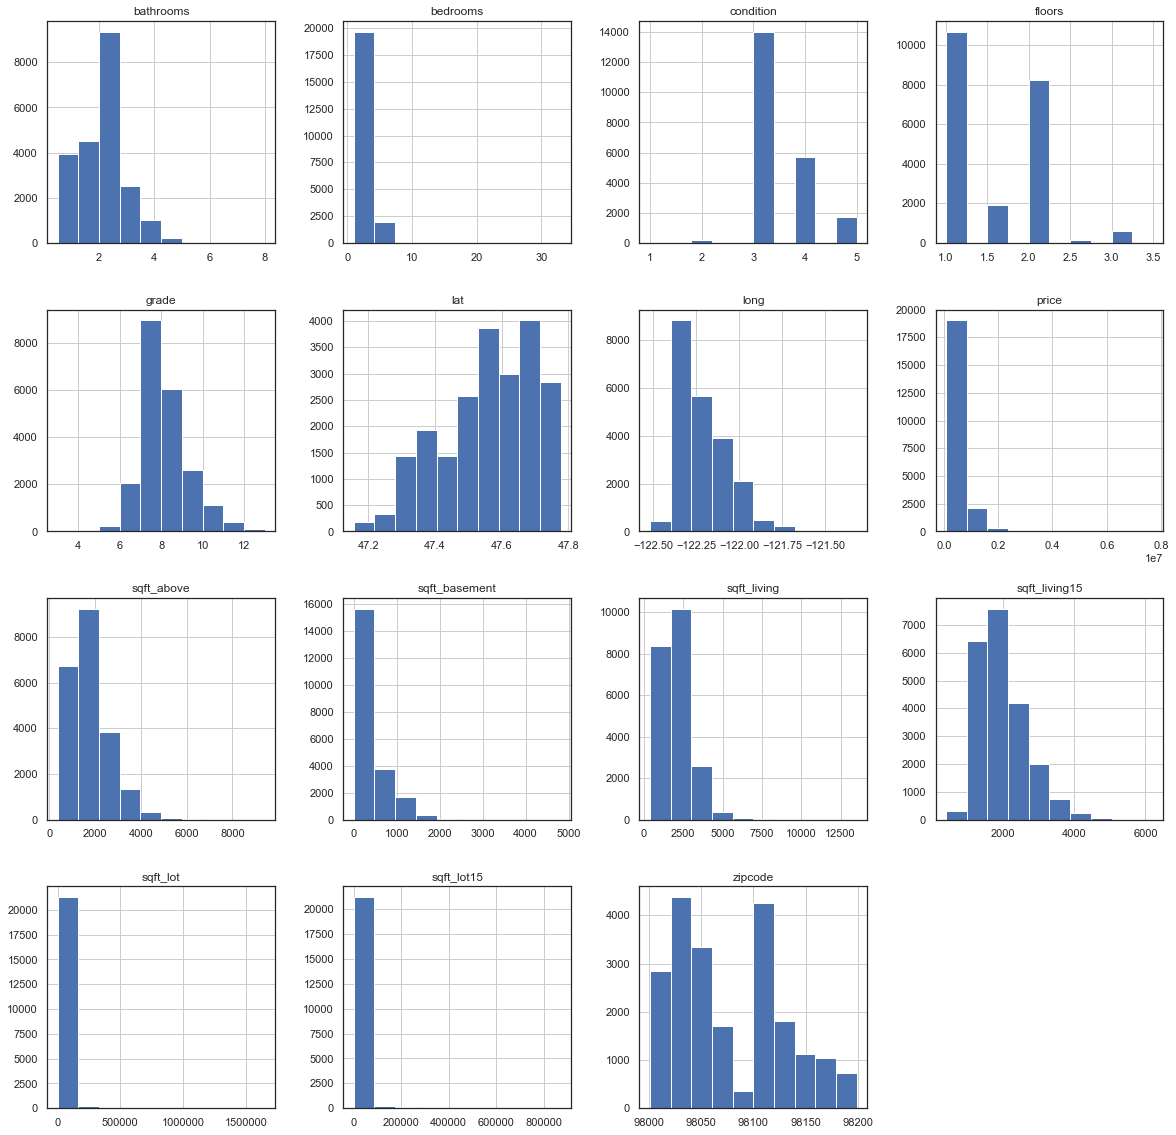

In [39]:
df.hist(figsize=(20,20))

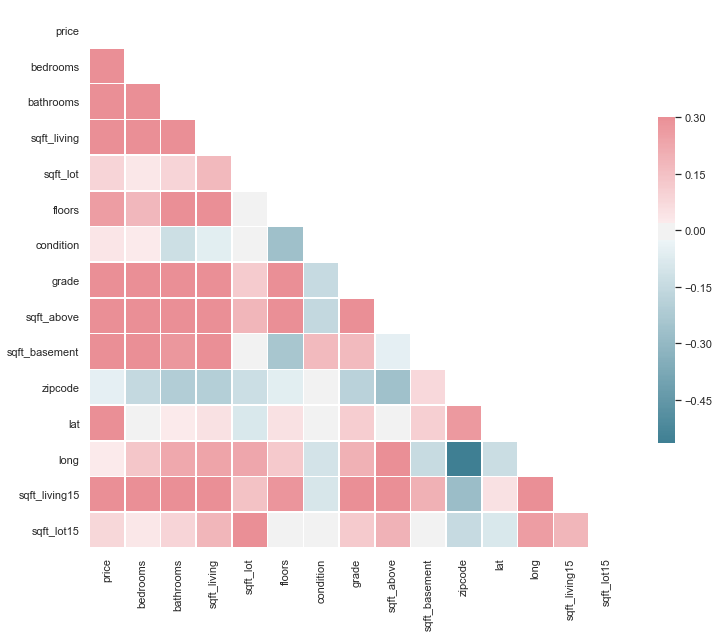

In [40]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})